In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os 

In [2]:
sys.path.insert(0,'../scripts/Images_generation/')
from images_generator import image_generator_sim, image_generator_real
from images_utils import get_scale_radius, get_data, shift_gal, peak_detection, draw_images
import cosmos_params

sys.path.insert(0,'../scripts/tools_for_VAE/')
from tools_for_VAE import utils, vae_functions, generator, model, plot, layers

/sps/lsst/users/barcelin/miniconda/envs/python_cpu4/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/sps/lsst/users/barcelin/miniconda/envs/python_cpu4/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/sps/lsst/users/barcelin/miniconda/envs/python_cpu4/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



# Image generation using parametric models (i.e. simulations)

## Generate image of isolated galaxies with brightest centered

In [20]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'isolated' #isolated blended
method_shift = 'noshift' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 1 # Maximum number of galaxies on an image
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [21]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [22]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

True


In [23]:
res[2]

{'redshift_0': 1.131700038909912,
 'moment_sigma_0': 2.4019737243652344,
 'e1_0': 0.06178378313779831,
 'e2_0': 0.2945025563240051,
 'mag_0': 26.24546799055339,
 'redshift': 1.131700038909912,
 'moment_sigma': 2.4019737243652344,
 'e1': 0.06178378313779831,
 'e2': 0.2945025563240051,
 'mag': 26.24546799055339,
 'closest_redshift': nan,
 'closest_moment_sigma': nan,
 'closest_e1': nan,
 'closest_e2': nan,
 'closest_mag': nan,
 'blendedness_total_lsst': nan,
 'blendedness_closest_lsst': nan,
 'blendedness_aperture_lsst': nan,
 'nb_blended_gal': 1,
 'mag_ir': -1.8992773799362404,
 'closest_mag_ir': nan,
 'closest_x': nan,
 'closest_y': nan,
 'idx_closest_to_peak': 0,
 'n_peak_detected': 1,
 'SNR': 57.55217032382663,
 'SNR_peak': 0.05408212758654296}

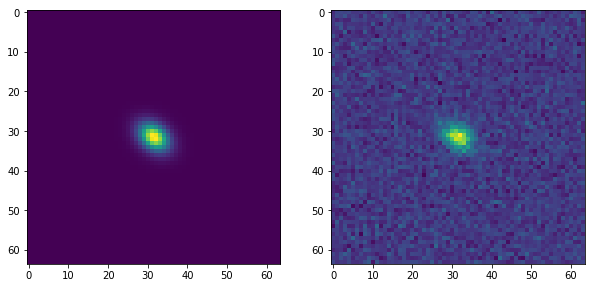

In [24]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

## Generate image of blended galaxies without brightest centered

In [33]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 6 # Maximum number of galaxies on an image
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [ ]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [37]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest)

True


In [38]:
res[2]

{'redshift_0': 0.7178000211715698,
 'moment_sigma_0': 1.834620475769043,
 'e1_0': 0.057585231959819794,
 'e2_0': -0.12959717214107513,
 'mag_0': 26.033861707360877,
 'redshift_1': 0.2921000123023987,
 'moment_sigma_1': 1.6076533794403076,
 'e1_1': -0.35992616415023804,
 'e2_1': 0.19508258998394012,
 'mag_1': 27.412402803324195,
 'redshift_2': 10.0,
 'moment_sigma_2': 10.0,
 'e1_2': 10.0,
 'e2_2': 10.0,
 'mag_2': 10.0,
 'redshift_3': 10.0,
 'moment_sigma_3': 10.0,
 'e1_3': 10.0,
 'e2_3': 10.0,
 'mag_3': 10.0,
 'redshift_4': 10.0,
 'moment_sigma_4': 10.0,
 'e1_4': 10.0,
 'e2_4': 10.0,
 'mag_4': 10.0,
 'redshift_5': 10.0,
 'moment_sigma_5': 10.0,
 'e1_5': 10.0,
 'e2_5': 10.0,
 'mag_5': 10.0,
 'redshift': 0.7178000211715698,
 'moment_sigma': 1.834620475769043,
 'e1': 0.057585231959819794,
 'e2': -0.12959717214107513,
 'mag': 26.033861707360877,
 'closest_redshift': 0.2921000123023987,
 'closest_moment_sigma': 1.607653260231018,
 'closest_e1': -0.3599291443824768,
 'closest_e2': 0.195082932

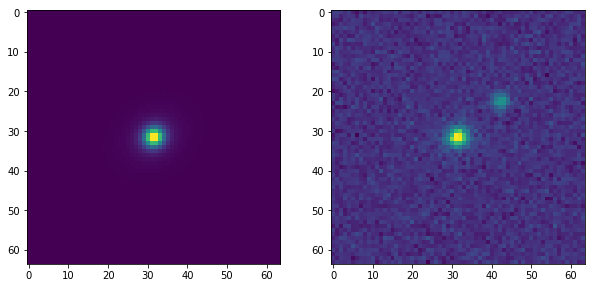

In [39]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

# Image generation using real galaxy images

A small correlated noise is observed on these 'denoised' real images. 

A procedure exists in GalSim to whiten the noise but is still not functionning yet. An issue is opened about this: https://github.com/GalSim-developers/GalSim/issues/1071

## Generate image of isolated galaxies

In [40]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'isolated' #isolated blended
method_shift = 'noshift' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 1 # Maximum number of galaxies on an image
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 26. # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

In [ ]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [43]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [44]:
res[2]

{'redshift': 0.39469999074935913,
 'moment_sigma': 2.776848793029785,
 'e1': 0.2202572375535965,
 'e2': -0.3323778510093689,
 'mag': 24.77144442528282,
 'closest_redshift': nan,
 'closest_moment_sigma': nan,
 'closest_e1': nan,
 'closest_e2': nan,
 'closest_mag': nan,
 'blendedness_total_lsst': nan,
 'blendedness_closest_lsst': nan,
 'blendedness_aperture_lsst': nan,
 'nb_blended_gal': 1,
 'mag_ir': -2.1556051241733103,
 'closest_mag_ir': nan,
 'closest_x': nan,
 'closest_y': nan,
 'idx_closest_to_peak': 0,
 'n_peak_detected': 1,
 'SNR': 182.73140302187565,
 'SNR_peak': 0.16289229219263207}

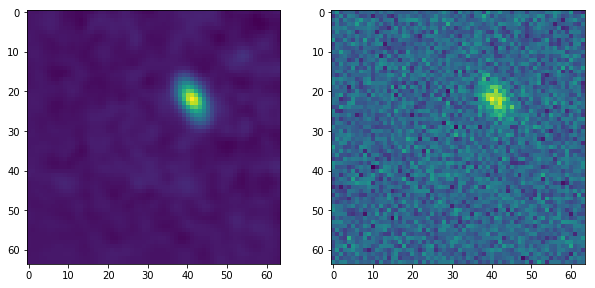

In [45]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

## Generate image of blended galaxies

In [58]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 6 # Maximum number of galaxies on an image
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 26 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'annulus'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [ ]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [59]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [60]:
res[2]

{'redshift': 0.8285999894142151,
 'moment_sigma': 2.5135436058044434,
 'e1': -0.17149588465690613,
 'e2': 0.4382849335670471,
 'mag': 25.216409793207852,
 'closest_redshift': 0.7409999966621399,
 'closest_moment_sigma': 2.9506070613861084,
 'closest_e1': 0.5679100751876831,
 'closest_e2': 0.34602266550064087,
 'closest_mag': 25.78154244281794,
 'blendedness_total_lsst': 0.2544552683830261,
 'blendedness_closest_lsst': 0.58673656,
 'blendedness_aperture_lsst': 0.18203656197374438,
 'nb_blended_gal': 6,
 'mag_ir': -2.609208987408018,
 'closest_mag_ir': -2.2957383117683925,
 'closest_x': 0.6020302155355421,
 'closest_y': -0.31917722410537935,
 'idx_closest_to_peak': 0,
 'n_peak_detected': 1,
 'SNR': 131.93934704093527,
 'SNR_peak': 0.12497151095527541}

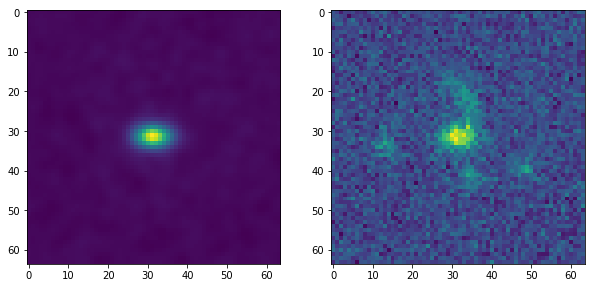

In [61]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

# Image generation of field

 51.2 arcseconds of LSST (256x256 pixels, 256 x 0.2 = 51.2 - 0.2 arcsecond/pix is pixel size of LSST data), so shift in 51.2/2 = 25,6 arcseconds.
 
 On these field I add a random number between 1 and 128 galaxies so that, if we generate a lot of these, the mean is at 64 galaxies per patch (mean of galaxies density after 10 years of operation for LSST, https://arxiv.org/pdf/1911.02505.pdf, part 2.4 page 4)

In [3]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 128 # Maximum number of galaxies on an image
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 256 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 25.6 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

In [4]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

## With simulations

In [5]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [6]:
res[2]

{'redshift_0': 1.000100016593933,
 'moment_sigma_0': 2.6345150470733643,
 'e1_0': 0.40755730867385864,
 'e2_0': 0.8265389800071716,
 'mag_0': 27.349229117766193,
 'redshift_1': 1.8451000452041626,
 'moment_sigma_1': 2.689448595046997,
 'e1_1': -0.50425785779953,
 'e2_1': -0.2753061354160309,
 'mag_1': 26.555919082340825,
 'redshift_2': 1.6687999963760376,
 'moment_sigma_2': 1.8149924278259277,
 'e1_2': -0.13740931451320648,
 'e2_2': -0.2821831703186035,
 'mag_2': 26.667021986763448,
 'redshift_3': 0.302700012922287,
 'moment_sigma_3': 1.9255599975585938,
 'e1_3': -0.13059039413928986,
 'e2_3': -0.14190788567066193,
 'mag_3': 26.750064792544997,
 'redshift_4': 0.8569999933242798,
 'moment_sigma_4': 1.7352023124694824,
 'e1_4': 0.11719562858343124,
 'e2_4': -0.010280300863087177,
 'mag_4': 26.97533427541645,
 'redshift_5': 3.02810001373291,
 'moment_sigma_5': 1.6146310567855835,
 'e1_5': 0.23911415040493011,
 'e2_5': -0.16675971448421478,
 'mag_5': 26.511275494892146,
 'redshift_6': 2.08

In [7]:
print(str(res[2]['nb_blended_gal'])+' galaxies are added to this image.')

51 galaxies are added to this image.


Here res[0] is not very interesting to plot. It is just the first galaxy which was generated, not necessarily the brightest one, as we set the parameter center_brightest to False.

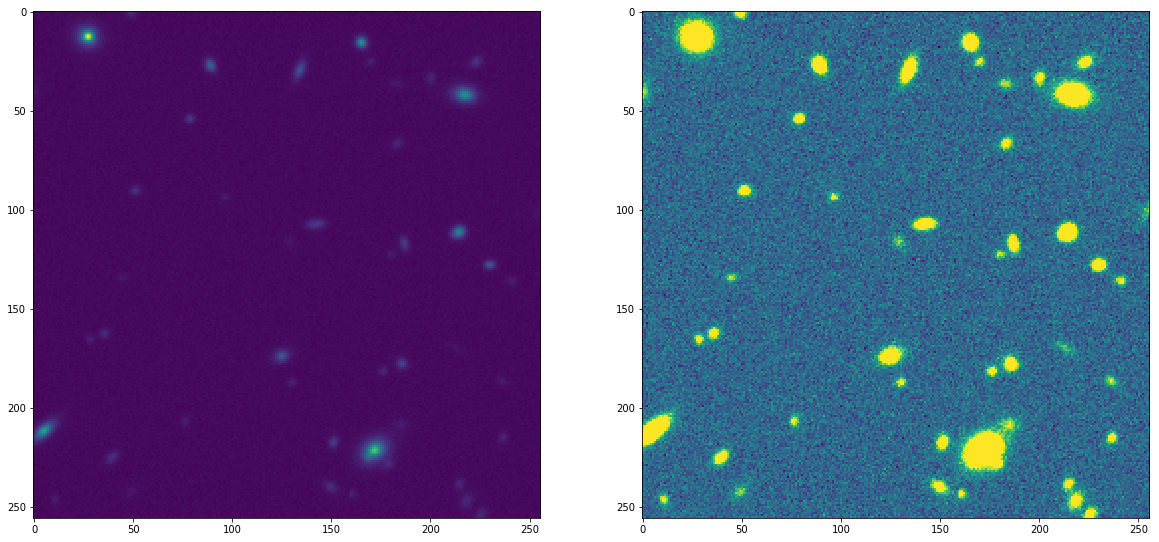

In [8]:
fig, ax = plt.subplots(1,2, figsize =(20,10))
ax[0].imshow(res[1][6])
ax[1].imshow(res[1][6], vmax = 2000)

Use the plot_rgb function of the plot module to show the image in RGB (IRG bands)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


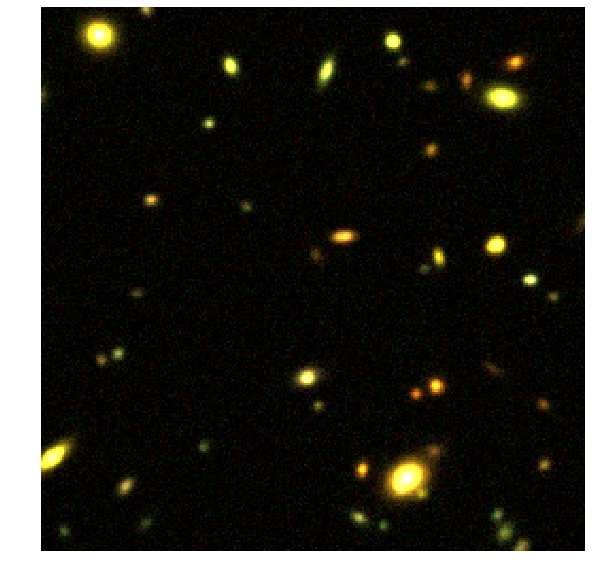

In [9]:
bands = [7,6,5] # Plot ugrizy

fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, clip = False)

Put a cross on the center of each galaxy with the shift information generated when the image is created.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


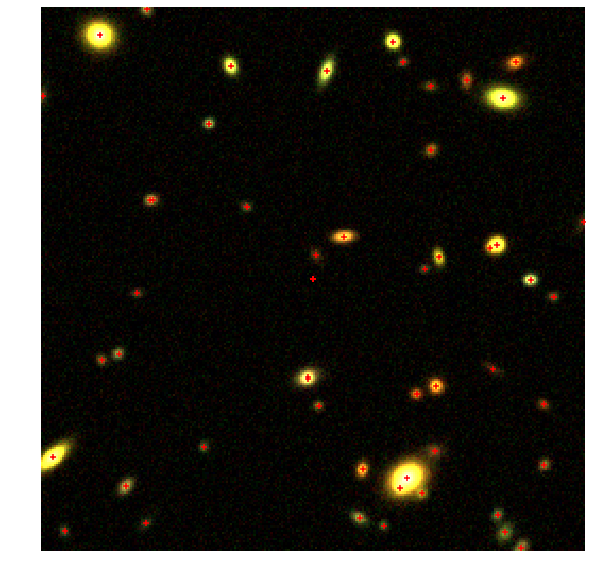

In [10]:
bands = [7,6,5] # Plot ugrizy
pixel_scale_lsst = 0.2 # arcsec/pix
fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, shifts = res[3]/pixel_scale_lsst, clip = False)

## With real images

In [12]:
reload(model)

TypeError: 'module' object is not callable

In [8]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest)

Error: adaptive moment failed

Error: too many iterations in adaptive moments

Error: adaptive moment failed



KeyboardInterrupt: 

In [ ]:
res[2]

In [ ]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])